# Exploratory Data Analysis (EDA)
In this section, I explore the trends and patterns in our cleaned board games data files to better understand popularity, longevity and quality of games.

Below is a reminder of what our data sets now look like:

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly as px

## File 1 - Board Games

In [2]:
# Load the CSV file
df1 = pd.read_csv('Boardgames_SQL_Cleaned_File.csv') 

# Create new column "Adjusted Release year"
df1['Adjusted Release Year'] = df1['Release Year'].apply(lambda x: 2001 if x < 2001 else x)

# Calculate the number of years since the games adjusted release year
df1['Years Since Release'] = 2024 - df1['Adjusted Release Year']
df1['Years Since Release'] = df1['Years Since Release'].replace(0,1)

# Calculate votes per year rounded to nearest whole number
df1['Votes per Adjusted Release Year'] = df1['Voters'] / df1['Years Since Release']
df1['Votes per Adjusted Release Year'] = df1['Votes per Adjusted Release Year'].round(0).astype(int)

# Calculate the standard deviation on Votes per Adjusted Release Year and apply it as a weighting column
mean_votes = df1['Votes per Adjusted Release Year'].mean()
std_dev_votes = df1['Votes per Adjusted Release Year'].std(ddof=0)
df1['SDs from Mean'] = (df1['Votes per Adjusted Release Year'] - mean_votes) / std_dev_votes
df1['SD Weight'] = 1 / ((df1['SDs from Mean'].abs() + 1))
df1['Weighted Result'] = df1['Votes per Adjusted Release Year'] * df1['SD Weight']
df1['Weighted Result'] = df1['Weighted Result'].round(2)

# Normalised results on a scale of -1 to 1 and name it Popularity
min_sd = df1['Weighted Result'].min()
max_sd = df1['Weighted Result'].max()
df1['Popularity'] = 2 * ((df1['Weighted Result'] - min_sd) / (max_sd - min_sd)) - 1
df1['Popularity'] = df1['Popularity'].round(2)

# Normalised Geek Rating on a scale of -1 to 1 and name it Quality
min_sd = df1['Geek Rating'].min()
max_sd = df1['Geek Rating'].max()
df1['Quality'] = 2 * ((df1['Geek Rating'] - min_sd) / (max_sd - min_sd)) - 1
df1['Quality'] = df1['Quality'].round(2)

# Add a column called score
df1['Score'] = df1['Popularity'] + df1['Quality']

# Show the top 10 rows
df1.head(10)

,Rank,Game ID,Title,Description,Release Year,Geek Rating,Avg Rating,Voters,Adjusted Release Year,Years Since Release,Votes per Adjusted Release Year,SDs from Mean,SD Weight,Weighted Result,Popularity,Quality,Score
0,1,224517,Brass: Birmingham,"Build networks, grow industries, and navigate ...",2018,8.407,8.58,50109,2018,6,8352,13.716504,0.067951,567.53,0.94,1.00,1.94
1,2,161936,Pandemic Legacy: Season 1,Mutating diseases are spreading around the wor...,2015,8.370,8.52,54954,2015,9,6106,9.963960,0.091208,556.92,0.90,0.98,1.88
2,3,342942,Ark Nova,"Plan and build a modern, scientifically manage...",2021,8.342,8.53,49624,2021,3,16541,27.398418,0.035213,582.46,0.99,0.97,1.96
3,4,174430,Gloomhaven,Vanquish monsters with strategic cardplay. Ful...,2017,8.335,8.57,64071,2017,7,9153,15.054789,0.062287,570.11,0.95,0.97,1.92
4,5,233078,Twilight Imperium: Fourth Edition,"Build an intergalactic empire through trade, r...",2017,8.232,8.58,25359,2017,7,3623,5.815445,0.146726,531.59,0.82,0.92,1.74
5,6,316554,Dune: Imperium,"Influence, intrigue, and combat in the univers...",2020,8.228,8.43,50373,2020,4,12593,20.802229,0.045867,577.60,0.97,0.92,1.89
6,7,167791,Terraforming Mars,Compete with rival CEOs to make Mars habitable...,2016,8.204,8.35,104081,2016,8,13010,21.498939,0.044447,578.25,0.98,0.91,1.89
7,8,115746,War of the Ring: Second Edition,The Fellowship and the Free Peoples clash with...,2011,8.192,8.55,22685,2011,13,1745,2.677744,0.271906,474.48,0.62,0.91,1.53
8,9,187645,Star Wars: Rebellion,Strike from your hidden base as the Rebels—or ...,2016,8.169,8.42,33850,2016,8,4231,6.831271,0.127693,540.27,0.85,0.90,1.75
9,10,162886,Spirit Island,Island Spirits join forces using elemental pow...,2017,8.144,8.34,55560,2017,7,7937,13.023136,0.071311,565.99,0.93,0.88,1.81


## File 2 - Board Game Reviews

In [3]:
# Load the CSV file
df2 = pd.read_csv('Boardgames_Reviews_SQL_Cleaned_File.csv') 

# Create the new column 'First Year Review Count'
df2['First Year Review Count'] = df2.apply(lambda row: row[str(row['Adjusted Release Year'] + 1)], axis=1)

# Show the top 10 rows
df2.head(10)

,Game ID,Title,Release Year,Adjusted Release Year,2001,2002,2003,2004,2005,2006,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,First Year Review Count
0,7,Cathedral,1979,2001,22,29,93,86,127,162,...,188,165,163,143,153,159,147,157,137,29
1,9,El Caballero,1998,2001,20,34,67,62,80,93,...,48,53,47,35,45,33,38,36,53,34
2,14,Basari,1998,2001,9,12,54,73,100,122,...,53,57,54,48,61,44,40,39,46,12
3,15,Cosmic Encounter,1977,2001,47,82,200,206,270,294,...,131,125,96,93,98,90,81,82,52,82
4,17,Button Men,1999,2001,9,22,46,43,53,61,...,32,36,30,20,18,20,20,15,8,22
5,19,Wacky Wacky West,1991,2001,17,20,68,66,72,98,...,74,79,77,79,92,85,80,85,67,20
6,20,Full Metal Planète,1988,2001,3,14,20,14,28,26,...,30,29,39,42,32,23,27,29,28,14
7,21,Gateway to the Stars,1994,2001,0,2,2,3,2,3,...,1,0,2,1,1,0,0,2,1,2
8,23,Divine Right,1979,2001,3,10,25,23,44,36,...,22,21,22,29,24,22,13,16,68,10
9,24,Twilight Imperium,1997,2001,8,21,72,70,68,55,...,16,16,15,10,16,7,9,10,11,21


## File 3 - Board Game Info

In [4]:
# Load the CSV file
df3 = pd.read_csv('Boardgame_Info_Cleaned_File.csv') 

# Fields to winsorize
columns_to_winsorize = ['Price', 'Max players', 'Min time (mins)', 'Max time (mins)']

# Calculate 99th percentile and Clip and cap the values
for col in columns_to_winsorize:
    upper_cap = df3[col].quantile(0.99)
    df3[col] = df3[col].clip(upper=upper_cap)
    df3[col] = df3[col].apply(lambda x: upper_cap if x > upper_cap else x)

# Add a new column for average playtime
df3['Average playtime (mins)'] = (df3['Min time (mins)'] + df3['Max time (mins)']) / 2

# Get the unique types from both columns
unique_types = pd.unique(df3[['Type 1', 'Type 2']].values.ravel('K'))

# Create columns for each unique type and set the category
for type in unique_types:
    df3[type] = ((df3['Type 1'] == type) | (df3['Type 2'] == type)).astype(int)

# Show the top 10 rows
df3.head(10)

,Title,Price,Complexity,Min players,Max players,Min time (mins),Max time (mins),Age Rating,Type 1,Type 2,Average playtime (mins),Strategy,Thematic,Family,Customizable,Abstract,Party,Wargames,Children's,NaN
0,Brass: Birmingham,84.99,3.89,2.0,4.0,60.0,120.0,14.0,Strategy,NaN,90.0,1,0,0,0,0,0,0,0,0
1,Pandemic Legacy: Season 1,49.97,2.83,2.0,4.0,60.0,60.0,13.0,Strategy,Thematic,60.0,1,1,0,0,0,0,0,0,0
2,Gloomhaven,NaN,3.90,1.0,4.0,60.0,120.0,14.0,Strategy,Thematic,90.0,1,1,0,0,0,0,0,0,0
3,Ark Nova,58.99,3.74,1.0,4.0,90.0,150.0,14.0,Strategy,NaN,120.0,1,0,0,0,0,0,0,0,0
4,Twilight Imperium: Fourth Edition,126.49,4.31,3.0,6.0,240.0,480.0,14.0,Strategy,Thematic,360.0,1,1,0,0,0,0,0,0,0
5,Terraforming Mars,79.99,3.26,1.0,5.0,120.0,120.0,12.0,Strategy,NaN,120.0,1,0,0,0,0,0,0,0,0
6,Dune: Imperium,51.43,3.03,1.0,4.0,60.0,120.0,14.0,Strategy,NaN,90.0,1,0,0,0,0,0,0,0,0
7,Gloomhaven: Jaws of the Lion,36.97,3.64,1.0,4.0,30.0,120.0,14.0,Strategy,Thematic,75.0,1,1,0,0,0,0,0,0,0
8,War of the Ring: Second Edition,74.89,4.21,2.0,4.0,150.0,180.0,13.0,Thematic,Wargames,165.0,0,1,0,0,0,0,1,0,0
9,Star Wars: Rebellion,NaN,3.74,2.0,4.0,180.0,240.0,14.0,Thematic,NaN,210.0,0,1,0,0,0,0,0,0,0


## File 4 - Local Store Titles

In [5]:
# Load the CSV file
df5 = pd.read_csv('My_Local_BG_Store_Cleaned_File.csv') 

# Show the top 10 rows
df5.head(10)

,Title
0,1812 Invasion of Canada
1,20 Second Showdown
2,3 Wise Words
3,5 Second Rule
4,504
5,51st State
6,6 Nimmt!
7,7 Wonders
8,7 Wonders Duel
9,A Fake Artist Goes to New York


---

## Descriptive Analysis
Performing some simple descriptive analysis will allows us to quickly determine if our cleaning and transformation steps have worked as expected, and ensure we understand the data sets we are working with.

### Board Games (file 1)

In [6]:
df1.shape
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25795 entries, 0 to 25794
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Rank                             25795 non-null  int64  
 1   Game ID                          25795 non-null  int64  
 2   Title                            25795 non-null  object 
 3   Description                      14193 non-null  object 
 4   Release Year                     25795 non-null  int64  
 5   Geek Rating                      25795 non-null  float64
 6   Avg Rating                       25795 non-null  float64
 7   Voters                           25795 non-null  int64  
 8   Adjusted Release Year            25795 non-null  int64  
 9   Years Since Release              25795 non-null  int64  
 10  Votes per Adjusted Release Year  25795 non-null  int64  
 11  SDs from Mean                    25795 non-null  float64
 12  SD Weight         

,Rank,Game ID,Release Year,Geek Rating,Avg Rating,Voters,Adjusted Release Year,Years Since Release,Votes per Adjusted Release Year,SDs from Mean,SD Weight,Weighted Result,Popularity,Quality,Score
count,25795.000000,25795.000000,25795.000000,25795.000000,25795.000000,25795.000000,25795.000000,25795.000000,25795.000000,2.579500e+04,25795.000000,25795.000000,25795.000000,25795.000000,25795.000000
mean,13875.355263,150777.912309,2007.309672,5.676895,6.439024,999.598721,2011.943826,12.056174,142.297228,1.762928e-17,0.811621,62.191974,-0.789818,-0.196870,-0.986688
std,8167.152892,125719.032552,38.832680,0.356542,0.909714,4354.571290,7.598720,7.598720,598.538951,1.000019e+00,0.122368,110.515951,0.378192,0.156325,0.520598
min,1.000000,1.000000,400.000000,3.845000,1.260000,30.000000,2001.000000,1.000000,1.000000,-2.360748e-01,0.029193,0.810000,-1.000000,-1.000000,-1.500000
25%,6699.500000,18745.500000,2004.000000,5.509000,5.880000,57.000000,2004.000000,5.000000,5.000000,-2.293917e-01,0.812306,4.070000,-0.990000,-0.270000,-1.260000
50%,13803.000000,148434.000000,2014.000000,5.539000,6.480000,132.000000,2014.000000,10.000000,16.000000,-2.110133e-01,0.820098,13.210000,-0.960000,-0.260000,-1.210000
75%,21059.500000,256874.500000,2019.000000,5.662000,7.050000,441.000000,2019.000000,20.000000,61.000000,-1.358288e-01,0.846783,53.710000,-0.820000,-0.200000,-1.020000
max,27898.000000,433444.000000,2023.000000,8.407000,9.840000,132623.000000,2023.000000,23.000000,20046.000000,3.325446e+01,0.999504,585.210000,1.000000,1.000000,1.960000


#### Observations
Really happy with how this is looking. From this we can see:
- We have the expect number of rows at 25,795.
- The Release Year field can be compared to the Adjusted Release Year field so that we can see that changes we made here have worked. The minimum release year goes from 400 to 2001 as expected.
- Our weighted normalised Popularity score has a minimum of -1 and a maximum of 1 as expected.
- Our normalised Quality score also has a minimum of -1 and a maximum of 1 as expected and making it easy to plot these to metrics.

### Board Game Reviews (file 2)

In [7]:
df2.shape
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20822 entries, 0 to 20821
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Game ID                  20822 non-null  int64 
 1   Title                    20822 non-null  object
 2   Release Year             20822 non-null  int64 
 3   Adjusted Release Year    20822 non-null  int64 
 4   2001                     20822 non-null  int64 
 5   2002                     20822 non-null  int64 
 6   2003                     20822 non-null  int64 
 7   2004                     20822 non-null  int64 
 8   2005                     20822 non-null  int64 
 9   2006                     20822 non-null  int64 
 10  2007                     20822 non-null  int64 
 11  2008                     20822 non-null  int64 
 12  2009                     20822 non-null  int64 
 13  2010                     20822 non-null  int64 
 14  2011                     20822 non-nul

,Game ID,Release Year,Adjusted Release Year,2001,2002,2003,2004,2005,2006,2007,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,First Year Review Count
count,20822.000000,20822.000000,20822.000000,20822.000000,20822.000000,20822.000000,20822.000000,20822.000000,20822.000000,20822.000000,...,20822.000000,20822.000000,20822.000000,20822.000000,20822.000000,20822.000000,20822.000000,20822.000000,20822.000000,20822.000000
mean,107363.449477,2003.922822,2009.663769,0.368264,1.027087,2.936702,4.371770,7.031505,9.077418,14.244741,...,68.498463,81.386946,83.955144,94.499232,99.369657,91.357170,90.988234,86.741283,79.234416,100.652723
std,96982.182671,42.524770,6.653734,2.454408,5.883965,15.548132,23.147613,37.883674,49.108985,75.170270,...,368.154383,420.448404,415.944782,450.567037,491.200459,465.972362,481.418496,481.455179,441.936225,434.723703
min,1.000000,400.000000,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11209.750000,2001.000000,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,2.000000,3.000000,4.000000,3.000000,3.000000,2.000000,2.000000,2.000000
50%,89904.000000,2011.000000,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,6.000000,7.000000,9.000000,9.000000,8.000000,7.000000,7.000000,6.000000,10.000000
75%,192287.500000,2016.000000,2016.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,...,20.000000,25.000000,28.000000,33.000000,33.000000,28.000000,27.000000,24.000000,23.000000,42.000000
max,404427.000000,2019.000000,2019.000000,67.000000,202.000000,492.000000,944.000000,1428.000000,1809.000000,2724.000000,...,13317.000000,12212.000000,13395.000000,14202.000000,16683.000000,15666.000000,17244.000000,18214.000000,16513.000000,16683.000000


#### Observations
- We have the expected 20,822 rows.
- We can see the adjusted release year column has worked as intended.
- The volume of votes get higher in later years as would be expected as more and more games are released.

### Board Game info (file 3)

In [8]:
df3.shape
df3.info()
df3.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25339 entries, 0 to 25338
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Title                    25339 non-null  object 
 1   Price                    4150 non-null   float64
 2   Complexity               25339 non-null  float64
 3   Min players              25298 non-null  float64
 4   Max players              25298 non-null  float64
 5   Min time (mins)          24513 non-null  float64
 6   Max time (mins)          24513 non-null  float64
 7   Age Rating               23841 non-null  float64
 8   Type 1                   13327 non-null  object 
 9   Type 2                   1828 non-null   object 
 10  Average playtime (mins)  24513 non-null  float64
 11  Strategy                 25339 non-null  int64  
 12  Thematic                 25339 non-null  int64  
 13  Family                   25339 non-null  int64  
 14  Customizable          

,Price,Complexity,Min players,Max players,Min time (mins),Max time (mins),Age Rating,Average playtime (mins),Strategy,Thematic,Family,Customizable,Abstract,Party,Wargames,Children's,NaN
count,4150.000000,25339.000000,25298.000000,25298.000000,24513.000000,24513.000000,23841.000000,24513.000000,25339.000000,25339.000000,25339.000000,25339.000000,25339.000000,25339.000000,25339.000000,25339.000000,25339.0
mean,50.508139,1.959908,1.977152,5.798166,55.713417,77.026924,10.280315,66.370171,0.112159,0.061881,0.119855,0.013694,0.054067,0.033150,0.164490,0.038794,0.0
std,44.627096,0.833278,0.700374,10.264659,62.829443,100.526789,2.821029,77.156302,0.315568,0.240944,0.324798,0.116221,0.226154,0.179033,0.370727,0.193107,0.0
min,1.990000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,23.292500,1.290000,2.000000,4.000000,20.000000,30.000000,8.000000,22.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,37.305000,1.890000,2.000000,4.000000,30.000000,45.000000,10.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,59.950000,2.500000,2.000000,6.000000,60.000000,90.000000,12.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,272.412500,5.000000,10.000000,99.000000,360.000000,720.000000,21.000000,540.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


#### Observations
- The maximum price cap of 272.41 has worked and is in effect.
- Complexity ranges on a scale of 1 to 5 with a greater concentration at the lower end of the scale (more less complex games.)
- The max players cap of 99 has worked.
- The min time cap of 360 has worked.
- The max time cap of 720 has worked.

---

## Distribution of Quality scores
The below histogram shows the distribution of each games quality score:

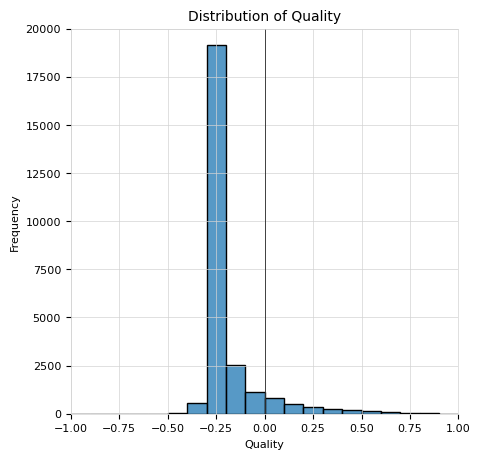

In [9]:
# Create the histogram
plt.figure(figsize=(5, 5))
sns.histplot(df1['Quality'], bins=20)

# Set the x-axis range
plt.xlim(-1, 1)
plt.ylim(0, 20000)

# Customize the format
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.gca().spines['top'].set_color('lightgrey')
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['right'].set_color('lightgrey')
plt.gca().spines['right'].set_linewidth(0.5)
plt.gca().spines['left'].set_color('lightgrey')
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_color('lightgrey')
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.title('Distribution of Quality', fontsize=10)
plt.xlabel('Quality', fontsize=8)
plt.ylabel('Frequency', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Display the chart
plt.show()

### Observations
The highest concentration of quality scores is -0.25. There are a few likely reasons for this:
- Volume effect, lots of mediocre games flood the market every year.
- BGG user bias, most games are ranked slightly high overall, but not enough to push the weaker games up far.
- The Geek Rating system with the Bayesian adjustment will cause games to naturally cluster around a lower score.

This tells us the standout games really are worth investigating.

## Distribution of Popularity scores
The below histogram shows the distribution of each games popularity score:

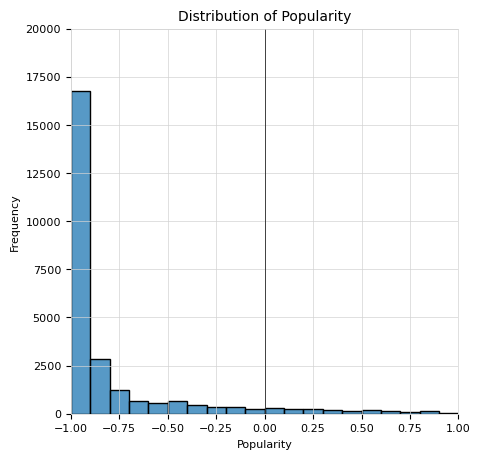

In [10]:
# Create the histogram
plt.figure(figsize=(5, 5))
sns.histplot(df1['Popularity'], bins=20)

# Set the x-axis range
plt.xlim(-1, 1)
plt.ylim(0, 20000)

# Customize the format
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.gca().spines['top'].set_color('lightgrey')
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['right'].set_color('lightgrey')
plt.gca().spines['right'].set_linewidth(0.5)
plt.gca().spines['left'].set_color('lightgrey')
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_color('lightgrey')
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.title('Distribution of Popularity', fontsize=10)
plt.xlabel('Popularity', fontsize=8)
plt.ylabel('Frequency', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Display the chart
plt.show()

### Observations
Most games do not break away from the sink of obscurity. Why might this happen?
- Oversaturation, with so many games released every year, it's not surprise only a few take off to stardom.
- Shelf-life reality, board games tend to have a short attention window unless they become somewhat of a phenomenon.
- BGG user activity bias, forums of popular games are more active and cause a snowball effect on popularity.

This again tells us it is important to understand how a games popularity breaks away from the pack.

---

## Correlation Analysis
I decided to remove Avg Rating and Votes Per Adjusted Release Year from the correlation matrix as they are already covered more accurately by Popularity and Quality. 

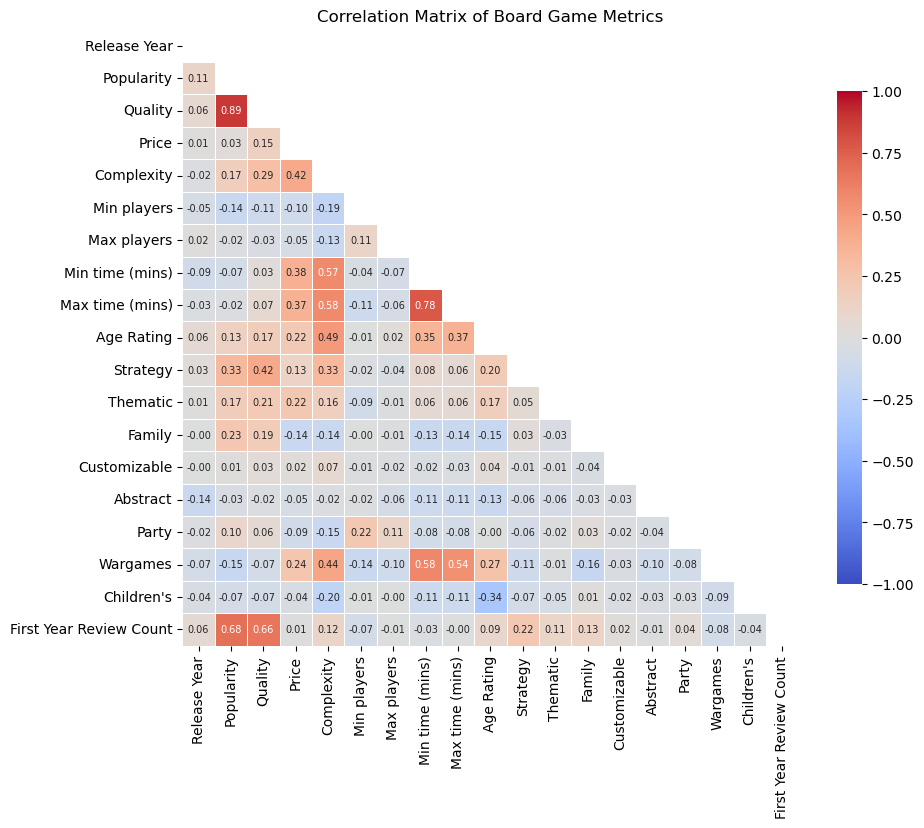

In [11]:
# Merge Board Games with Board Game Info on Title
df1['Title'] = df1['Title'].str.strip()
df3['Title'] = df3['Title'].str.strip()
merged_df4 = pd.merge(df1, df3, on='Title', how='inner')

# Merge the new column into merged_df1 based on 'Game ID'
merged_df4 = merged_df4.merge(df2[['Game ID', 'First Year Review Count']], on='Game ID', how='left')

# Calculate the correlation matrix
corr_matrix = merged_df4[['Release Year', 'Popularity', 'Quality', 'Price', 'Complexity', 'Min players', 'Max players', 'Min time (mins)', 'Max time (mins)', 'Age Rating', 'Strategy',	'Thematic',	'Family', 'Customizable', 'Abstract', 'Party', 'Wargames', 'Children\'s', 'First Year Review Count']].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot and format
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    vmin=-1, vmax=1,
    linewidths=0.5,
    square=True,
    annot_kws={"size": 7},
    cbar_kws={"shrink": 0.8}
)

plt.title('Correlation Matrix of Board Game Metrics')
plt.show()

### Observations
- A score of 1 indicates a perfect positive correlation.
- A score of -1 indicates a perfect negative correlation.
- A score of 0 indicates no correlation detected.

There are no negative relationships between any variables.

##### No Relationship ( r < 0.25)
- **Release Year** 
- **Min players** 
- **Max players**  

#### Positive Relationships

##### Weak Relationship (r 0.25 to 0.50)
- 0.29 - **Complexity** and **Quality**
- 0.42 - **Complexity** and **Price**
- 0.49 - **Complexity** and **Age Rating**
- 0.35 - **Age Rating** and **Min time (mins)** 
- 0.37 - **Age Rating** and **Max time (mins)**
- 0.37 - **Price** and **Max time (mins)**
- 0.38 - **Price** and **Min time (mins)**
- 0.33 and 0.42 **Strategy** games with **Popularity** and **Quality**
  
##### Moderate Relationship (r 0.50 to 0.75)
- 0.57 - **Complexity** and **Min time (mins)**
- 0.58 - **Complexity** and **Max time (mins)**
- 0.58 and 0.54 - **Wargames** and **Playtimes**
- 0.68 and 0.66 - **First Year Review Count** with **Quality** and **Popularity**
  
##### Strong Relationship (r > 0.75)
- 0.78 - **Max time (mins)** and **Min time (mins)**
- 0.89 - **Quality** and **Popularity**

### What does this tell us?
- Complexity has a relationship with several variables so could be a strong statistical contender.
- The strong link between Popularity and Quality is reassuring. Good games are more popular etc.
- We could consider removing Release Year, Min players and Max players from the statistical model due to the lack of relationship between variables.
- Wargames are more complex and take longer to play.
- Strategy games are more popular and of better quality.

Might be worth making a single factor correlation between these "drop-list" variables and "Score" to see if they should be dropped from the model. 

---

## Raw Geek Rating vs Voters
The below code plots the raw unchanged Geek Rating against the raw unchanged Voters. It then highlights the top 10 voters in red to show just how extreme some of these popular outliers are.

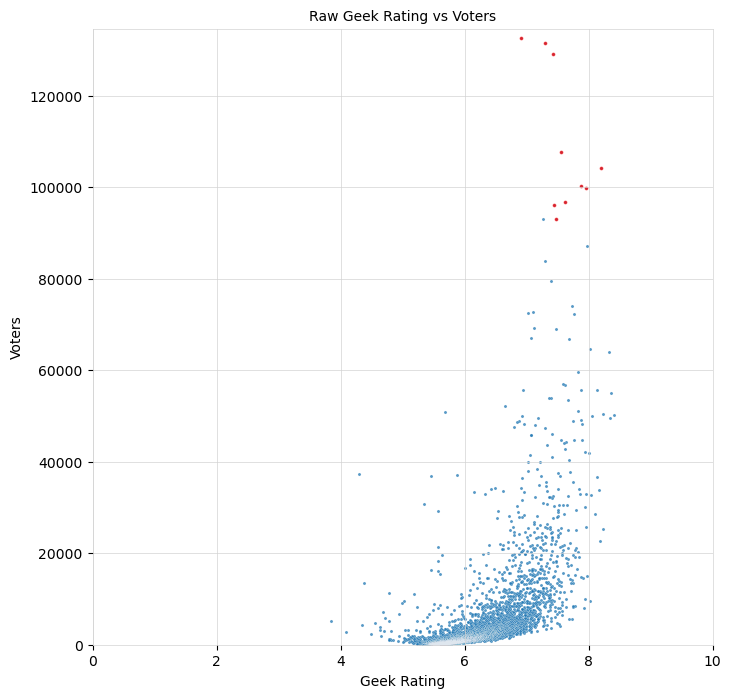

In [12]:
# Identify top 10 votes
top_10_voters = df1.nlargest(10, 'Voters')

# Create scatter plot
plt.figure(figsize=(8,8))
sns.scatterplot(
    data=df1,
    x='Geek Rating',
    y='Voters',
    s=5, 
    alpha=0.75
)

# Highlight the top 10 results in red
sns.scatterplot(
    data=top_10_voters,
    x='Geek Rating',
    y='Voters',
    s=7.5, 
    color='red',
    alpha=0.75,
)

# Titles and labels
plt.title('Raw Geek Rating vs Voters', fontsize=10)
plt.xlabel('Geek Rating', fontsize=10)
plt.ylabel('Voters', fontsize=10)
plt.grid(True, color='lightgrey', linewidth=0.5)
for spine in plt.gca().spines.values():
    spine.set_edgecolor('lightgrey')
    spine.set_linewidth(0.5)

# Change axis limits
plt.xlim(0, 10)
plt.ylim(0, df1['Voters'].max() + 2000)

# Show the plot
plt.show()

This highlights the importance of what we have done in out data cleaning steps. The outliers in the raw data causes the majority of games to be very consolidated together making it difficult to determine any meaningful insight.

## Quality vs Popularity
Lets now create a scatter plot showing our Popularity scores vs Quality scores. The below code also:
- Adds a curved orange trend line.
- Highlights games in yellow where they have both a Quality and Popularity score > 0.4.
- Adds labels to name the games in some of the interesting positions.

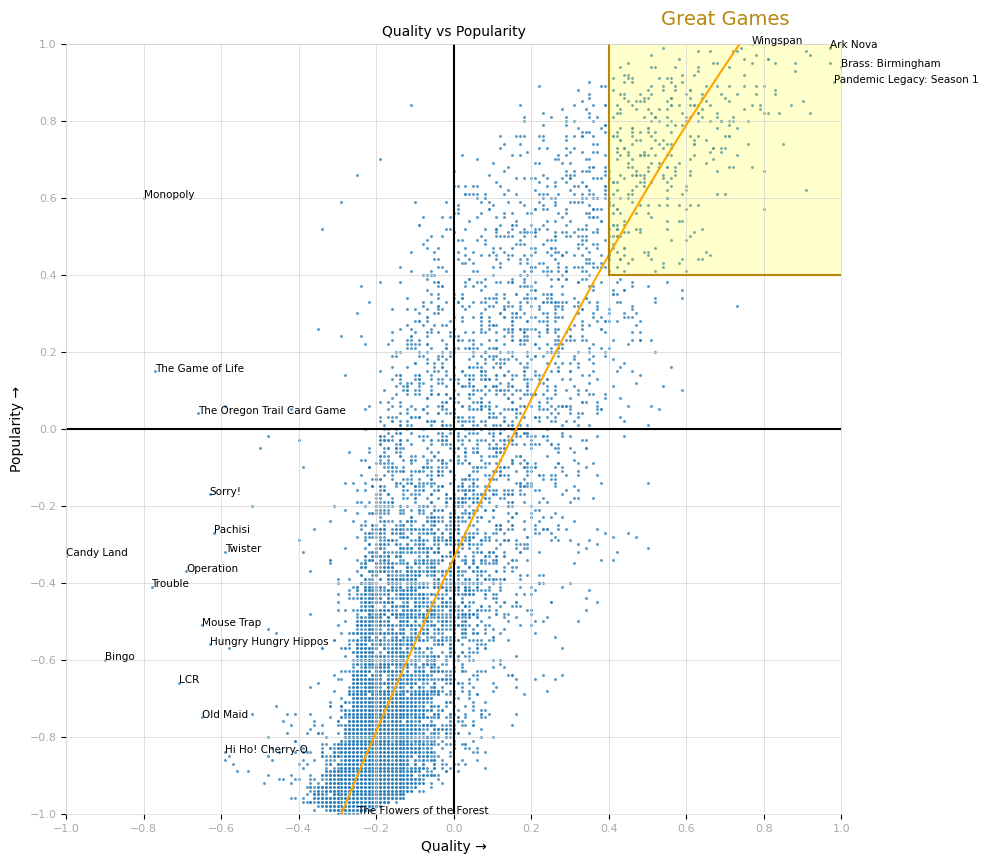

In [13]:
# Create scatter plot
plt.figure(figsize=(10,10))
sns.scatterplot(
    data=df1,
    x='Quality',
    y='Popularity',
    s=5,
    alpha=0.75
)

# Titles, axis and formats
plt.title('Quality vs Popularity', fontsize=10)
plt.xlabel('Quality →', fontsize=10)
plt.ylabel('Popularity →', fontsize=10)
plt.grid(True, color='lightgrey', linewidth=0.5)
for spine in plt.gca().spines.values():
    spine.set_edgecolor('lightgrey')
    spine.set_linewidth(0.5)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xticks([i * 0.2 for i in range(-5, 6)], fontsize=8, color='darkgrey')
plt.yticks([i * 0.2 for i in range(-5, 6)], fontsize=8, color='darkgrey')
plt.axhline(0, color='black', linewidth=1.5)
plt.axvline(0, color='black', linewidth=1.5)

# Add a curved trend line in orange
z = np.polyfit(df1['Quality'], df1['Popularity'], 2)
p = np.poly1d(z)
plt.plot(df1['Quality'], p(df1['Quality']), color='orange')

# Mark the top right-hand section with grid lines to form a box
plt.plot([0.4, 0.4], [0.4, 1], color='darkgoldenrod', linewidth=1.5)
plt.plot([0.4, 1], [0.4, 0.4], color='darkgoldenrod', linewidth=1.5)
plt.fill_betweenx([0.4, 1], 0.4, 1, color='yellow', alpha=0.2)
plt.text(0.7, 1.05, 'Great Games', color='darkgoldenrod', fontsize=14, ha='center')

# Add labels to the points with highest and lowest popularity and quality
top_popularity = df1.nlargest(2, 'Popularity')
bottom_popularity = df1.nsmallest(1, 'Popularity')
top_quality = df1.nlargest(2, 'Quality')
bottom_quality = df1.nsmallest(15, 'Quality')
for _, row in pd.concat([top_popularity, bottom_popularity, top_quality, bottom_quality]).iterrows():
    plt.text(row['Quality'], row['Popularity'], row['Title'], fontsize=7.5)

# Show plot
plt.show()

There is a lot going on here, but I do think this is a very powerful visual. Lets break it down.

### The four quadrants
- **Top Left** - High Popularity, Low Quality - **Timeless Classics**
- **Top Right** - High Popularity, High Quality - **Good Games**
- **Bottom Left** - Low Popularity, Low Quality - **Starting out/Flop**
- **Bottom Right** - Low Popularity, High Quality - **Hidden Gems/Niche**

### The golden section - Great Games
These games have the highest popularity and quality scores and are therefore classified as the "Great Games". These will form an integral part of our statistical analysis as will be used to determine the features of a great game.

### The trend
The orange line shows the trend across all points. This tells us that as quality increases, a games popularity also increases. More people are interested in a good game! Although I'm sure that's not new information. Good to see that this expectation is met though, and it builds trust in the classification process we have used for Popularity and Quality.

## Adding real world value and insight
To add an extra dimension of practical value, I scraped a live inventory of data from my local board game shops inventory. This allows me to plot which games from the data set are held by the board game cafe. I overlaid this to the above scatter plot where:
- Blue point represent games from the full data set.
- Red points represent games available at the local board game cafe.

### Why this matters
- This demonstrates the ability to gather external data sources and integrate them into the analysis pipeline.
- It adds real-world commercial value by
    - **Identifying gaps** in the game stores inventory. Are there potential popular or quality games the retailer is not stocking.
-  It opens opportunities for future work, such as building data driven recommendations and stock decisions.

This bridges the gap between online statistical research, and local actionable business insight. 

The scatter plot has been saved as 'scatter_plot_high_res.png' with 1000 DPI resolution.


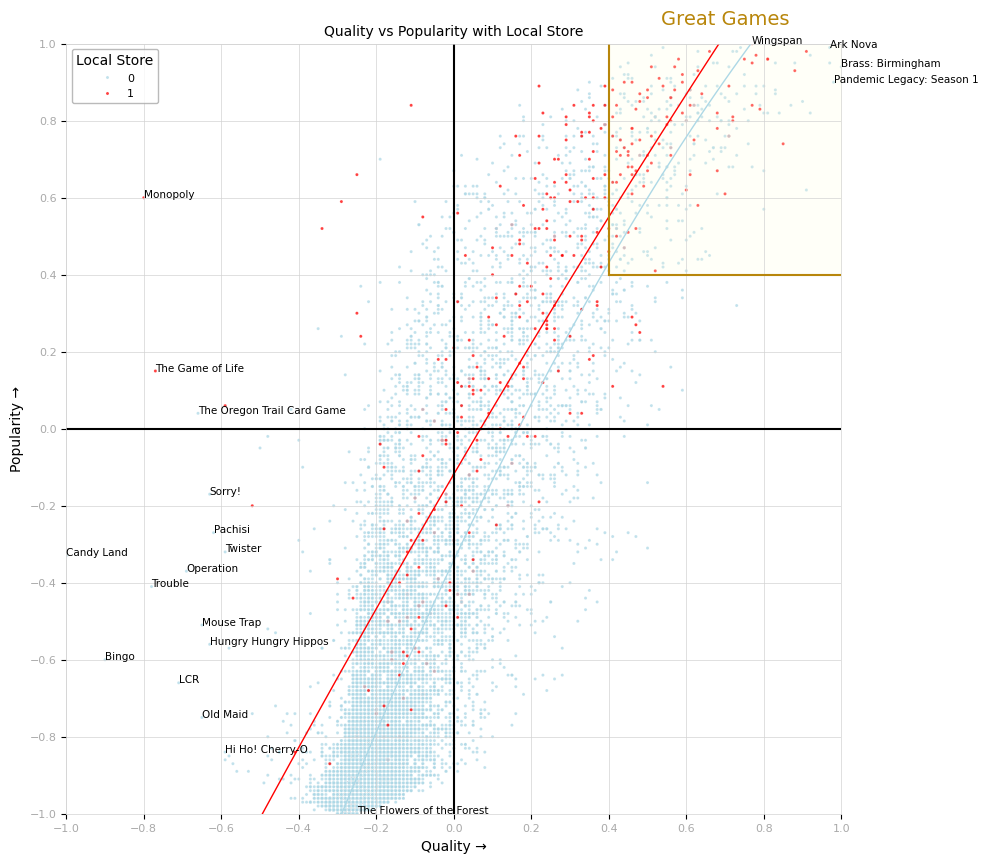

In [14]:
# Create a new column 'Local Store' in df1 with 1 if the title is in df5 and 0 if not
df1['Local Store'] = df1['Title'].apply(lambda x: 1 if x in df5['Title'].values else 0)

# Plot the scatter plot with different colors based on 'Local Store' column
plt.figure(figsize=(10,10))
sns.scatterplot(
    data=df1,
    x='Quality',
    y='Popularity',
    hue='Local Store',
    palette={0: 'Lightblue', 1: 'red'},
    s=5,
    alpha=0.75
)


# Add curved trend lines for blue and red dots
for local_store_value, color in zip([0, 1], ['Lightblue', 'red']):
    subset = df1[df1['Local Store'] == local_store_value]
    z = np.polyfit(subset['Quality'], subset['Popularity'], 2)
    p = np.poly1d(z)
    x = np.linspace(subset['Quality'].min(), subset['Quality'].max(), 100)
    plt.plot(x, p(x), color=color, linestyle='-', linewidth=1)



# Titles, axis and formats
plt.title('Quality vs Popularity with Local Store', fontsize=10)
plt.xlabel('Quality →', fontsize=10)
plt.ylabel('Popularity →', fontsize=10)
plt.grid(True, color='lightgrey', linewidth=0.5)
for spine in plt.gca().spines.values():
    spine.set_edgecolor('lightgrey')
    spine.set_linewidth(0.5)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xticks([i * 0.2 for i in range(-5, 6)], fontsize=8, color='darkgrey')
plt.yticks([i * 0.2 for i in range(-5, 6)], fontsize=8, color='darkgrey')
plt.axhline(0, color='black', linewidth=1.5)
plt.axvline(0, color='black', linewidth=1.5)

# Mark the top right-hand section with grid lines to form a box
plt.plot([0.4, 0.4], [0.4, 1], color='darkgoldenrod', linewidth=1.5)
plt.plot([0.4, 1], [0.4, 0.4], color='darkgoldenrod', linewidth=1.5)
plt.fill_betweenx([0.4, 1], 0.4, 1, color='lightyellow', alpha=0.2)
plt.text(0.7, 1.05, 'Great Games', color='darkgoldenrod', fontsize=14, ha='center')

# Add labels to the points with highest and lowest popularity and quality
top_popularity = df1.nlargest(2, 'Popularity')
bottom_popularity = df1.nsmallest(1, 'Popularity')
top_quality = df1.nlargest(2, 'Quality')
bottom_quality = df1.nsmallest(15, 'Quality')
for _, row in pd.concat([top_popularity, bottom_popularity, top_quality, bottom_quality]).iterrows():
    plt.text(row['Quality'], row['Popularity'], row['Title'], fontsize=7.5)

# Customise the legend
legend = plt.legend(title='Local Store', fontsize=8, title_fontsize=10, frameon=True)
legend.get_title().set_color('black')
legend.get_frame().set_edgecolor('darkgrey')
legend.get_frame().set_linewidth(1.0)
for text in legend.get_texts():
    text.set_color('black')

# Save the scatter plot as a high-resolution image file with 300 DPI
plt.savefig('scatter_plot_high_res.png', dpi=1000)

# Print a success message
print("The scatter plot has been saved as 'scatter_plot_high_res.png' with 1000 DPI resolution.")

# Show plot
plt.show()

### The power and potential of this data
- This allows us to highlight a **Top 10 games the store is missing**.
- What % of "Great Games" does the store hold.
- Can we predict the **potential gains** of carrying certain titles.

## This looked cool, I filled in some areas of the graph to get a feel for the types of games and where they plot

![Scatter_Coloured](../images/Scatter_Coloured.png)

## Plotting each games percentile

![Percentile_Plot](../images/Percentile_Plot.png)

I think there are two interesting call-outs when plotting the Quality and Popularity scores as percentiles. This means that every point must have a unique spot on the scatter plot and they will be placed in the most appropriate position.

![Percentile_Plot_Anot](../images/Percentile_Plot_Anot.png)

- Firstly, the green line. This tells us that as a games quality increases, so does it's popularity, as you might expect. People generally prefer good things right?
- However, the orange line tells an interesting story. Again, as quality increases, so does popularity. However, the popularity also increases in the case of a very poor quality game when looking at the already popular games. This is likely down to the nature under which someone feels compelled to leave a review, typically if something is really good, or really bad.
- I did hand-draw the lines to save time (took a few tries to get the curve right) but I think it still illustrates my point and shows my other skills as an artist.

---

# Great Game Classification
A **Great Game** is defined as:
- Quality score of 0.4 or greater.
- Popularity score of 0.4 or greater.

## Why these scores?
It looks really good as a yellow square on my scatter plot.

Of course that's not the only reason.

For a game to be truly considered one of the greats it needs to both be popular, and of a high quality. But a decision needed to be made, how popular? and how quality?

In the table below, I have calculated just how many games fall into these categories.

In [15]:
# Count the number of games with a Quality of > 0.4
quality_count = df1[df1['Quality'] > 0.4].shape[0]

# Count the number of games with a Popularity of > 0.4
popularity_count = df1[df1['Popularity'] > 0.4].shape[0]

# Count the number of games with both Quality and Popularity > 0.4
both_count = df1[(df1['Quality'] > 0.4) & (df1['Popularity'] > 0.4)].shape[0]

# Calculate the total number of rows
total_rows = df1.shape[0]

# Calculate the percentages
quality_percentage = (quality_count / total_rows) * 100
popularity_percentage = (popularity_count / total_rows) * 100
both_percentage = (both_count / total_rows) * 100

# Create a Data Frame to display the results in a table format
results_df = pd.DataFrame({
    'Metric': ['Total Games', 'Quality Games', 'Popular Games', 'Quality and Popular Games', 'Percentage Quality', 'Percentage Popular', 'Percentage Quality and Popular'],
    'Value': [f"{total_rows:,}",f"{quality_count:,}", f"{popularity_count:,}", f"{both_count:,}", f"{quality_percentage:.1f}%", f"{popularity_percentage:.1f}%", f"{both_percentage:.1f}%"]
})

# Show the results
print(results_df)

                           Metric   Value
0                     Total Games  25,795
1                   Quality Games     419
2                   Popular Games     777
3       Quality and Popular Games     355
4              Percentage Quality    1.6%
5              Percentage Popular    3.0%
6  Percentage Quality and Popular    1.4%


As both the Quality and Popularity scores have been weighted and normalised, I wanted to make sure I was using a consistent threshold on both metrics for what a great game is. After playing around with the thresholds a little bit, >= 0.4 felt like a good measure.
This resulted in 1.4% of our sample being considered great games. The 1 in 100 approach (well 1 and a bit in 100!)

##### Interestingly, this mean all of the dots in the yellow "Great Games" box on the scatter plots above, only accounts for 1.4% of all games!

These games must be more popular than 97% of games and better quality than 98.4% of them. That's a tall ask and 355 games still meet this criteria. 

These values open up the potential for Logistic Regression where we look at predicting will a game be a "Great Game", yes or no. These values also allow is to predict how great a game is likely to be.

Let's add our "Great Game" column to our data table using the code below:

In [16]:
# Add a column called 'Great Game' which shows True or False based on Quality and Popularity >= 0.4
df1['Great Game'] = (df1['Quality'] >= 0.4) & (df1['Popularity'] >= 0.4)

# Show the top 10 rows
df1.head(10)

,Rank,Game ID,Title,Description,Release Year,Geek Rating,Avg Rating,Voters,Adjusted Release Year,Years Since Release,Votes per Adjusted Release Year,SDs from Mean,SD Weight,Weighted Result,Popularity,Quality,Score,Local Store,Great Game
0,1,224517,Brass: Birmingham,"Build networks, grow industries, and navigate ...",2018,8.407,8.58,50109,2018,6,8352,13.716504,0.067951,567.53,0.94,1.00,1.94,0,True
1,2,161936,Pandemic Legacy: Season 1,Mutating diseases are spreading around the wor...,2015,8.370,8.52,54954,2015,9,6106,9.963960,0.091208,556.92,0.90,0.98,1.88,0,True
2,3,342942,Ark Nova,"Plan and build a modern, scientifically manage...",2021,8.342,8.53,49624,2021,3,16541,27.398418,0.035213,582.46,0.99,0.97,1.96,0,True
3,4,174430,Gloomhaven,Vanquish monsters with strategic cardplay. Ful...,2017,8.335,8.57,64071,2017,7,9153,15.054789,0.062287,570.11,0.95,0.97,1.92,0,True
4,5,233078,Twilight Imperium: Fourth Edition,"Build an intergalactic empire through trade, r...",2017,8.232,8.58,25359,2017,7,3623,5.815445,0.146726,531.59,0.82,0.92,1.74,0,True
5,6,316554,Dune: Imperium,"Influence, intrigue, and combat in the univers...",2020,8.228,8.43,50373,2020,4,12593,20.802229,0.045867,577.60,0.97,0.92,1.89,0,True
6,7,167791,Terraforming Mars,Compete with rival CEOs to make Mars habitable...,2016,8.204,8.35,104081,2016,8,13010,21.498939,0.044447,578.25,0.98,0.91,1.89,1,True
7,8,115746,War of the Ring: Second Edition,The Fellowship and the Free Peoples clash with...,2011,8.192,8.55,22685,2011,13,1745,2.677744,0.271906,474.48,0.62,0.91,1.53,0,True
8,9,187645,Star Wars: Rebellion,Strike from your hidden base as the Rebels—or ...,2016,8.169,8.42,33850,2016,8,4231,6.831271,0.127693,540.27,0.85,0.90,1.75,0,True
9,10,162886,Spirit Island,Island Spirits join forces using elemental pow...,2017,8.144,8.34,55560,2017,7,7937,13.023136,0.071311,565.99,0.93,0.88,1.81,1,True


---

# It's feature engineering time
Now we know what a "**great game**" is, we need to look at what features each game possesses so we can calculate just how much of an impact it has on how good a game truly is (if any.)

To get our features, we need to merge our Boardgames_SQL_Cleaned_File (which contains the Popularity, Quality and Great Game classification etc), with our Boardgame_Info_Cleaned_File (which contains our board game information and features.) The below code merges the files and handles any NULL values with the mean.

In [17]:
# Merge the files
merged_bg_and_info = pd.merge(df1, df3, on='Title')

# Merge the new column into merged_df1 based on 'Game ID'
merged_bg_and_info = merged_bg_and_info.merge(df2[['Game ID', 'First Year Review Count']], on='Game ID', how='left')

# Use panda NULL
merged_bg_and_info.replace('',pd.NA, inplace=True)

# Handling NULL values by replacing them with the mean
for column in merged_bg_and_info.select_dtypes(include=['number']).columns:
    merged_bg_and_info[column].fillna(merged_bg_and_info[column].mean(), inplace=True)

# Show the top 10 rows
merged_bg_and_info.head(10)

,Rank,Game ID,Title,Description,Release Year,Geek Rating,Avg Rating,Voters,Adjusted Release Year,Years Since Release,...,Strategy,Thematic,Family,Customizable,Abstract,Party,Wargames,Children's,NaN,First Year Review Count
0,1,224517,Brass: Birmingham,"Build networks, grow industries, and navigate ...",2018,8.407,8.58,50109,2018,6,...,1,0,0,0,0,0,0,0,0,4601.000000
1,2,161936,Pandemic Legacy: Season 1,Mutating diseases are spreading around the wor...,2015,8.370,8.52,54954,2015,9,...,1,1,0,0,0,0,0,0,0,7597.000000
2,3,342942,Ark Nova,"Plan and build a modern, scientifically manage...",2021,8.342,8.53,49624,2021,3,...,1,0,0,0,0,0,0,0,0,102.713525
3,4,174430,Gloomhaven,Vanquish monsters with strategic cardplay. Ful...,2017,8.335,8.57,64071,2017,7,...,1,1,0,0,0,0,0,0,0,9610.000000
4,5,233078,Twilight Imperium: Fourth Edition,"Build an intergalactic empire through trade, r...",2017,8.232,8.58,25359,2017,7,...,1,1,0,0,0,0,0,0,0,2837.000000
5,6,316554,Dune: Imperium,"Influence, intrigue, and combat in the univers...",2020,8.228,8.43,50373,2020,4,...,1,0,0,0,0,0,0,0,0,102.713525
6,7,167791,Terraforming Mars,Compete with rival CEOs to make Mars habitable...,2016,8.204,8.35,104081,2016,8,...,1,0,0,0,0,0,0,0,0,9866.000000
7,8,115746,War of the Ring: Second Edition,The Fellowship and the Free Peoples clash with...,2011,8.192,8.55,22685,2011,13,...,0,1,0,0,0,0,1,0,0,336.000000
8,9,187645,Star Wars: Rebellion,Strike from your hidden base as the Rebels—or ...,2016,8.169,8.42,33850,2016,8,...,0,1,0,0,0,0,0,0,0,4707.000000
9,10,162886,Spirit Island,Island Spirits join forces using elemental pow...,2017,8.144,8.34,55560,2017,7,...,1,0,0,0,0,0,0,0,0,4396.000000


I used the below code to get a list of fields so I knew what to add or remove from the feature analysis.

In [18]:
merged_bg_and_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24969 entries, 0 to 24968
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Rank                             24969 non-null  int64  
 1   Game ID                          24969 non-null  int64  
 2   Title                            24969 non-null  object 
 3   Description                      13481 non-null  object 
 4   Release Year                     24969 non-null  int64  
 5   Geek Rating                      24969 non-null  float64
 6   Avg Rating                       24969 non-null  float64
 7   Voters                           24969 non-null  int64  
 8   Adjusted Release Year            24969 non-null  int64  
 9   Years Since Release              24969 non-null  int64  
 10  Votes per Adjusted Release Year  24969 non-null  int64  
 11  SDs from Mean                    24969 non-null  float64
 12  SD Weight         

## Time to plot some charts and look for patterns
The below code plots our feature variables against each other with the colour indicating the games overall score (Popularity score + Quality score.)

### There are a lot of variables
Lets trim it down into something more useful.

#### To avoid multicollinearity
- We know that Popularity and Quality are highly correlated, so we can combine those together into **Score**.
- Min and Max play-times are correlated, so we can combine those into a field called **Average Playtime**.

#### Utilising Domain Knowledge (I think)
- **Complexity**
- **Price**
- **Max Players**
- **Age Rating**
- **Local Store**

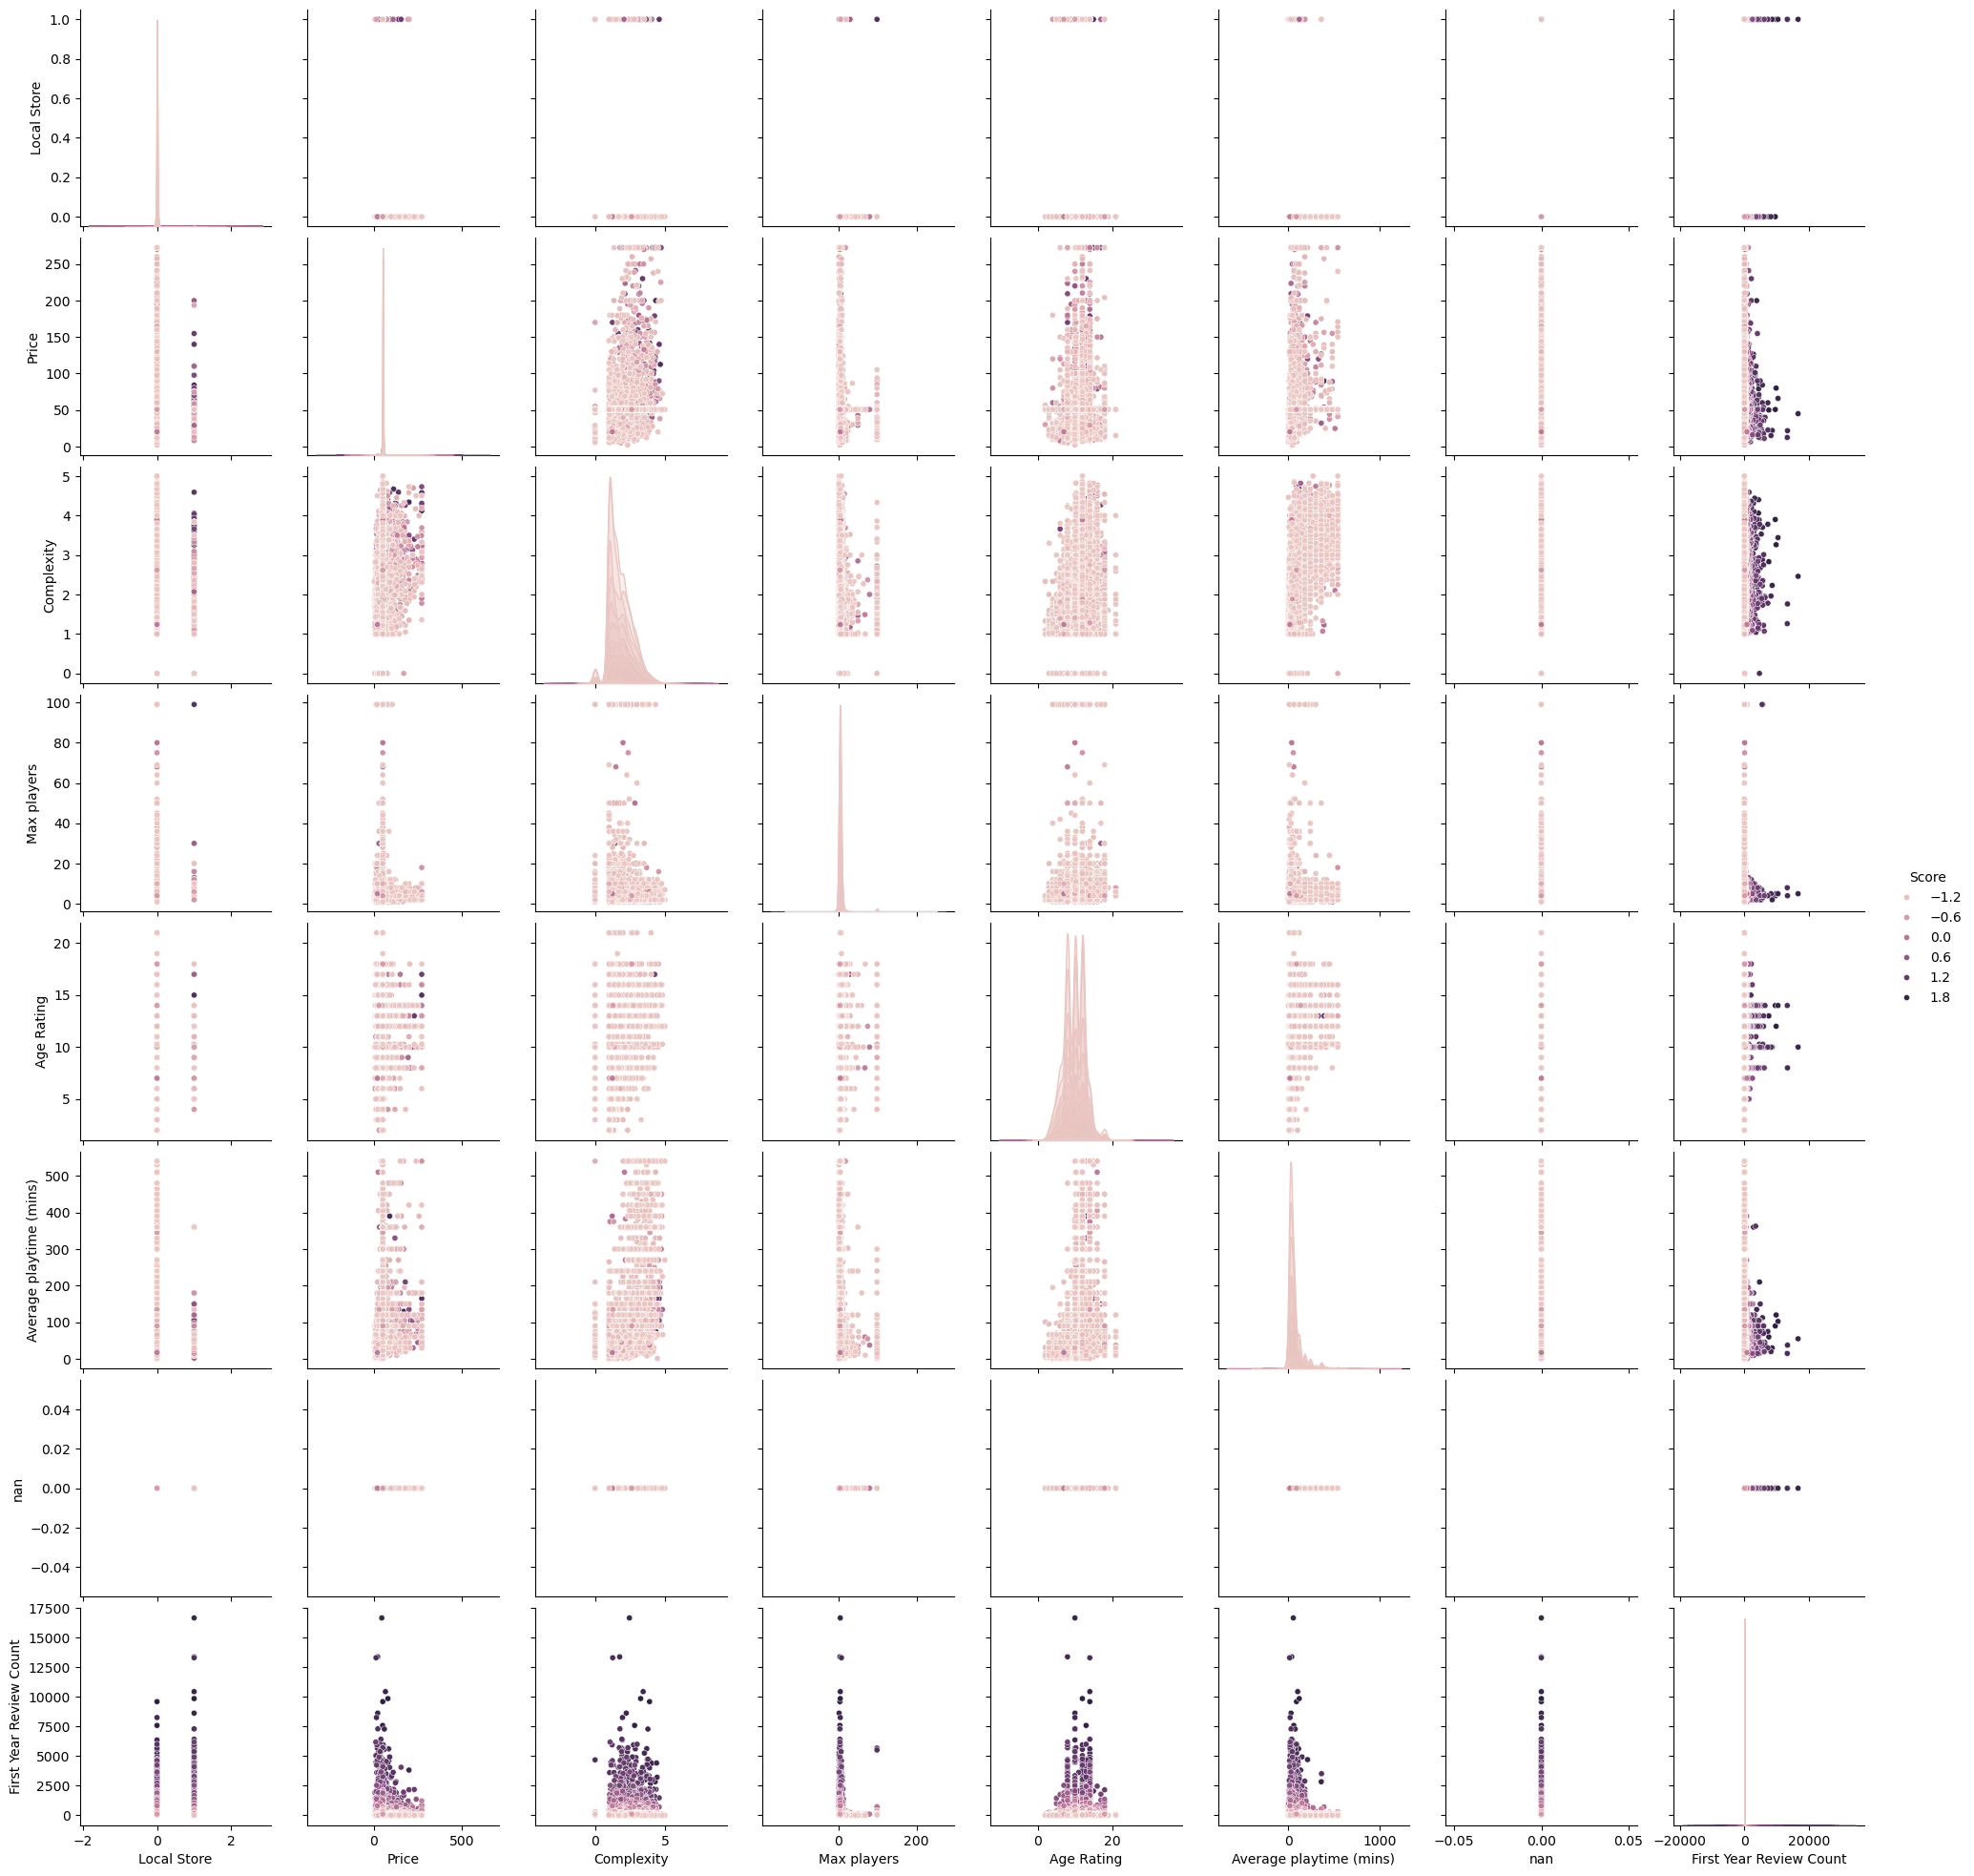

In [19]:
# Define features
features1 = ['Average playtime (mins)', 'Complexity', 'Price', 'Max players', 'Age Rating', 'Local Store', 'First Year Review Count']
X = merged_bg_and_info[features1]
y = merged_bg_and_info['Score']

# EDA
data_eda_score = merged_bg_and_info.drop(columns=['Rank', 'Game ID', 'Title', 'Description', 'Release Year', 'Geek Rating', 'Avg Rating', 'Voters', 'Adjusted Release Year', 'Years Since Release', 'Votes per Adjusted Release Year', 'SDs from Mean', 'SD Weight', 'Weighted Result', 'Popularity', 'Quality', 'Great Game', 'Min players', 'Min time (mins)', 'Max time (mins)', 'Type 1', 'Type 2', 'Strategy', 'Thematic',	'Family', 'Customizable', 'Abstract', 'Party', 'Wargames', 'Children\'s'])
sns.pairplot(data_eda_score, hue='Score', plot_kws={'s': 20})

# Show the result
plt.show()

This code, similar to above, plots a lot of charts comparing all of the variables. However, in this case we are showing just the "Great Game" classification as orange dots and all other games as blue dots.

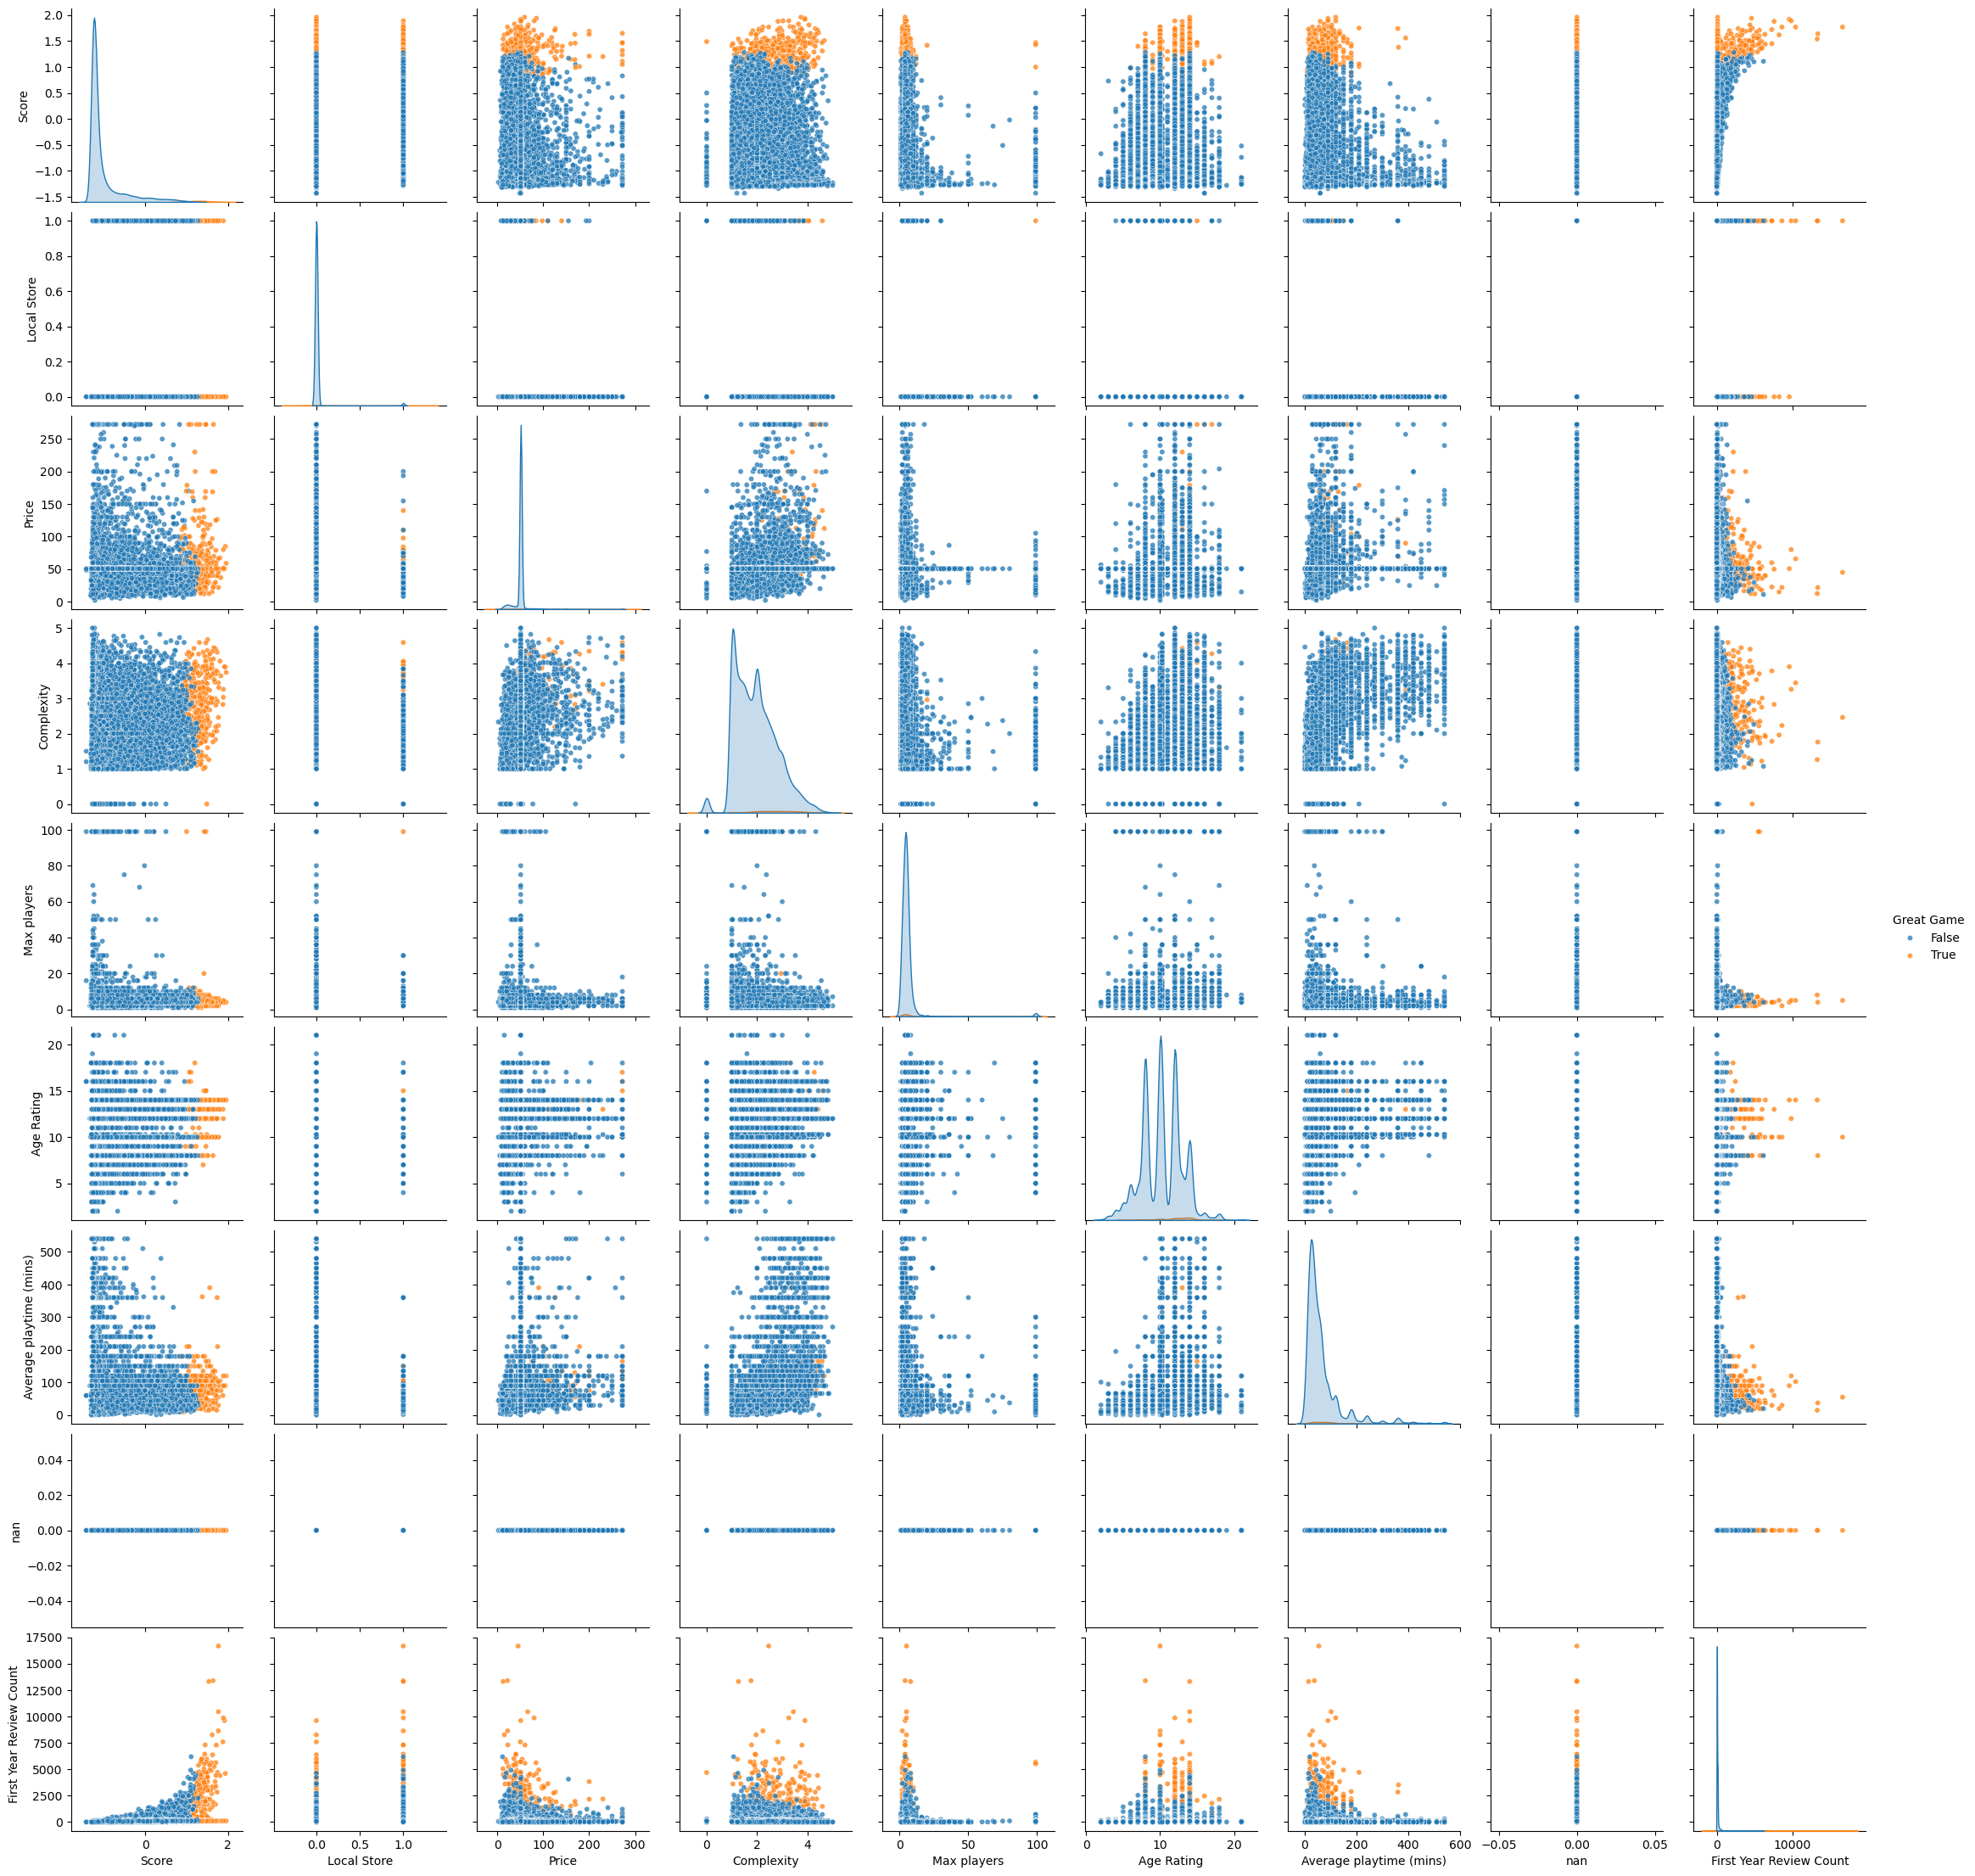

In [20]:
# Define features
features2 = ['Score', 'Average playtime (mins)', 'Complexity', 'Price', 'Max players', 'Age Rating', 'Local Store', 'First Year Review Count']
X = merged_bg_and_info[features2]
y = merged_bg_and_info['Great Game']

# EDA
data_eda_greatgame = merged_bg_and_info.drop(columns=['Rank', 'Game ID', 'Title', 'Description', 'Release Year', 'Geek Rating', 'Avg Rating', 'Voters', 'Adjusted Release Year', 'Years Since Release', 'Votes per Adjusted Release Year', 'SDs from Mean', 'SD Weight', 'Weighted Result', 'Popularity', 'Quality', 'Min players', 'Min time (mins)', 'Max time (mins)', 'Type 1', 'Type 2', 'Strategy', 'Thematic',	'Family', 'Customizable', 'Abstract', 'Party', 'Wargames', 'Children\'s'])
sns.pairplot(data_eda_greatgame, hue='Great Game', plot_kws={'s': 20, 'alpha': 0.75})

# Show the result
plt.show()

### Observations
#### Some observations about high scoring games:
- Tend to have a lower average playtime. I imagine this is related to attention span.
- Have an age rating of at least ~7. Could this be the age children develop an interest in board games?
- Tend to be more complex.
- Price does not appear to have an impact.

#### The local board game cafe:
- Stocks games with lower play times. This could be due to renting tables for time slots and being able to fit the games in.
- Has slightly lower complexity games on average.
- Does not have games with ludicrous player counts.
- Stocks lower price point games.

#### Other observations:
- Games marketed towards children are cheaper, less complex and quicker to play. 
- High player count games are cheaper and can be played quickly, likely to be party games.
- More complex games are more expensive and take longer to play.